## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Regresja liniowa wieloraka

Rzadko kiedy zdarza się taka sytuacja, że zależność opisuje się na podstawie tylko jednej zmiennej. Z reguły na wynik zmiennej objaśnianej (y) ma wpły więcej różnych cech. Przykładowo, na cenę samochodu ma wpływ rok produkcji, przebieg, ilość koni mechanicznych itp. Dlatego właśnie jest naturalna potrzeba rozwinięcia algorytmu regresji liniowej z jedną cechą na większą ilość cech.

Algorytm, który implementowaliśmy w poprzednim zadaniu jest szczególnym przypadkiem regresji liniowej, ale może zostać on w łatwy sposób uogólniony. Mechanizmy, które poznaliśmy wcześniej takie jak obliczanie funkcji błędu, pochodnych cząstkowych, w dalszym ciągu są aktualne. Trzeba jedynie uwzględnić dodatkowe cechy.

### Zadanie 1

W zbiorze danych z zarobkami, który wykorzystywany był w poprzednim zadaniu, znajduje się pominięta wcześniej cecha. Wczytaj dane z pliku Salary.csv, tym razem z dwiema zmiennymi objaśniającymi: YearsExperience i Age oraz zmienną objaśnianą Salary. Stwórz wykres 3D przedstawiający dane.

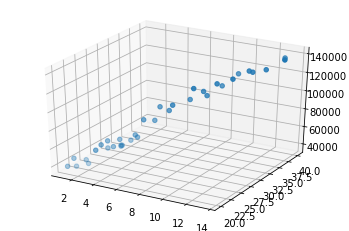

In [5]:
# YOUR CODE HERE

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


df = pd.read_csv('Salary.csv', sep=',')
y = df['Salary'].values.reshape(df['Salary'].shape[0], 1)
yearsOfExp = df['YearsExperience'].values.reshape(df['YearsExperience'].shape[0], 1)
age = df['Age'].values.reshape(df['Age'].shape[0], 1)


#print("x: ", yearsOfExp)
finalPlot = plt.axes(projection='3d')
finalPlot.scatter3D(yearsOfExp,age,y)

## Zadanie 2

Przerób algorytm znajdujący się w funkcji _learn_and_fit(x,y)_ w taki sposób, aby uwzględniał dodatkową cechę.
Funkcja regresji liniowej przybierze w tym momencie postać:

\begin{equation}
f(x^{(i)}) = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_2 = \beta_{0} + \beta_{1} YearsExperience + \beta_{2} Age
\end{equation}

Pojawienie się kolejnej cechy wymaga akutalizacji obliczania gradientu. Należy dodatkowo obliczyć pochodną cząstkową względem parametru $\beta_{2}$, a następnie zaktualizować wartość tego parametru. 

Obliczenie pochodnej cząstkowej wygląda analogicznie jak w przypadku parametru $\beta_{1}$.

\begin{equation}
    \frac{\partial SSR}{\partial \beta_{2}} = \frac{1}{n} \sum^{n}_{i=1} (f(x^{(i)}) - y^{(i)})x_{1}^{(i)}
\end{equation}

Aktualizacja wartości współczynnika również jest analogiczna.

\begin{equation}
    \beta_{2} = \beta_{2} - \alpha \frac{\partial SSR}{\partial \beta_{2}} 
\end{equation}

_Uwaga: Zastanów się, w jaki sposób zaimplementować obługę kolejnych cech, tak aby po pojawieniu się 3 cechy nie trzeba było modyfikować algorytmu._

In [36]:
'''
input:
X - wartości zmiennych objaśniających YearsExperience oraz Age dla wszystkich obserwacji
y - wartości zmiennej objaśnianej Salary dla wszystkich obserwacji

output:
b0: [] - lista z współczynnikami beta_0 w każdej z epok
betas: [] - lista z współczynnikami beta_1, beta_2 w każdej z epok
error: [] - lista z błędem w każdej epoce
'''
import random

def learn_and_fit(x,y):
    # YOUR CODE HERE
    b0 = []
    betas = []
    error = []
    global epoch
    epoch=10000
    alpha = 0.001
    global reg 
    reg = []
    #n=len(pred)

    b0.append(random.uniform(0,1))
    bet = []
    for b in range(len(x)):
        bet.append(random.uniform(0,1))
    betas.append(bet)
    

    #print("alpha: ", alpha,"b0: ", b0, "b0[0]: ", b0[0], "betas: ", betas)
    #print("x[0]: ", x[0],"x[1]: ", x[1])

    
    #main loop starts here
    for mainLoop in range(epoch):

        valueOfPred = []
        pred = []
        value=0.0


        #OBLICZANIE PREDYKCJI
        for i in range(len(x[0])):
            #print(i[0],j[0])
            #print(b0, betas, betas[0])
            #print(len(x))
            value = b0[0]

            #depending on how many x its given, that many beta values will be collected
            for j in range(len(x)):
                value = value + betas[mainLoop][j]*x[j][i][0]
                #print("value: ",value, "j: ",j)
            #value = b0 +b1*i[0] +b2*j[0]
            pred.append(value)

        #print("pred: ", pred,"x: ", x[0],x[1])




        #OBLICZANIE BŁĘDU REGRESJI
        sum=0
        #print("pred len:", len(pred))
        for k in range(len(pred)):
            sum = sum +(pred[k]-y[k]) ** 2
        SSR = sum[0] / (2*len(pred))

        error.append(SSR)
        #print("error: ", error)


        #OBLICZANIE GRADIENTU REGRESJI
        SSR=[]
        SSR0=0

        for l in range(len(pred)):
            SSR0 = SSR0 + pred[l] - y[l]
        SSR0 = SSR0[0]/len(pred)



        for m in range(len(x)):
            value=0
            for n in range(len(pred)):
                value = value + (pred[n]  -y[n]) * x[m][n][0]
            value = value/len(pred)
            SSR.append(value)
        #print(SSR0,SSR)



        #AKTUALIZACJA WSPÓŁCZYNNIKÓW REGRESJI
        #print("b0: ",b0[0], "SSR: ", SSR, "betas: ", betas[0])
        b0_temp=0
        #print("b0: ", mainLoop, b0[mainLoop])
        b0_temp = b0[mainLoop] - (alpha * SSR0)
        #print("b0_temp:",mainLoop, b0_temp)
        b0.append(b0_temp)
        #print("b0:", b0)
        b_temp=[]
        for o in range(len(x)):
            b_temp.append(betas[mainLoop][o] -(alpha * SSR[o][0]))
        betas.append(b_temp)
        reg.append(pred)

    #print("betas: ", betas, "b0: ", b0, "error: ",error)
    return b0, betas, error
#print(len(reg[0]))
learn_and_fit([yearsOfExp,age],y)

([0.544699280583306,
  0.5984517179665658,
  0.6118898880891578,
  0.6187253290843031,
  0.6244791966309472,
  0.6300557259543959,
  0.63560300948871,
  0.6411453012941914,
  0.6466865736232705,
  0.6522274770461066,
  0.6577681181195647,
  0.6633085143039491,
  0.6688486684676466,
  0.674388581089231,
  0.679928252255881,
  0.6854676819906733,
  0.6910068703061859,
  0.6965458172132771,
  0.7020845227225232,
  0.7076229868444536,
  0.71316120958959,
  0.7186991909684523,
  0.7242369309915597,
  0.7297744296694311,
  0.7353116870125846,
  0.7408487030315382,
  0.7463854777368091,
  0.7519220111389142,
  0.7574583032483702,
  0.7629943540756927,
  0.7685301636313976,
  0.7740657319259998,
  0.779601058970014,
  0.7851361447739542,
  0.7906709893483342,
  0.7962055927036673,
  0.8017399548504662,
  0.8072740757992434,
  0.8128079555605106,
  0.8183415941447791,
  0.82387499156256,
  0.8294081478243639,
  0.8349410629407007,
  0.8404737369220799,
  0.8460061697790108,
  0.8515383615220019

### Zadanie 3

Do stworzonego z zadaniu 1 wykresu dodaj płaszczyznę regresji. Pokaż w formie animacji, jak zmieniała się regresja w kolejnych epokach.

[[ 1.1  1.3  1.5 ... 12.3 12.9 13.5]
 [ 1.1  1.3  1.5 ... 12.3 12.9 13.5]
 [ 1.1  1.3  1.5 ... 12.3 12.9 13.5]
 ...
 [ 1.1  1.3  1.5 ... 12.3 12.9 13.5]
 [ 1.1  1.3  1.5 ... 12.3 12.9 13.5]
 [ 1.1  1.3  1.5 ... 12.3 12.9 13.5]] [[20 20 20 ... 20 20 20]
 [21 21 21 ... 21 21 21]
 [21 21 21 ... 21 21 21]
 ...
 [37 37 37 ... 37 37 37]
 [40 40 40 ... 40 40 40]
 [38 38 38 ... 38 38 38]]


AttributeError: 'list' object has no attribute 'ndim'

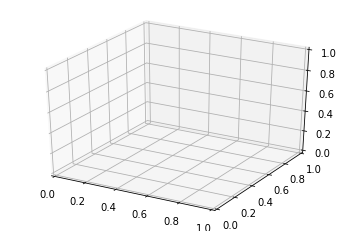

In [6]:

    import pandas as pd
    import matplotlib.pyplot as plt
    from mpl_toolkits import mplot3d
    import numpy as np
    from matplotlib.ticker import LinearLocator, FormatStrFormatter
    from matplotlib import cm
    
    df = pd.read_csv('Salary.csv', sep=',')
    y = df['Salary'].values.reshape(df['Salary'].shape[0], 1)
    yearsOfExp = df['YearsExperience'].values.reshape(df['YearsExperience'].shape[0], 1)
    age = df['Age'].values.reshape(df['Age'].shape[0], 1)


    fig = plt.figure()
    ax = plt.axes(projection="3d")   
    yearsOfExp, age = np.meshgrid(yearsOfExp, age)
    
    print(yearsOfExp,age)
    
    #ax.plot_wireframe(yearsOfExp, age, reg)
    ax.plot_surface(yearsOfExp, age, reg) #nie działa, reg musi być być tablicą 2D a jest wektorem
    
    plt.show()

### Zadanie 4

W sytuacji, w której zbiór danych zawiera więcej zmiennych objaśniających niż 2, niemożliwym staje się wizualizacja prostej regresji i ocena w taki sposób stworzonego modelu. Bardzo przydatnym rozwiązaniem jest wtedy stworzenie wykresu błędów regresji. Jeśli wartości błędu spadają wraz z kolejnymi epokami, oznacza to, że jesteśmy na dobrej drodze, a nasz algorytm działa poprawnie. Celem tego zadania będzie stworzenie finalnego modelu regresji liniowej, który będzie przyjmował dowolną liczbę zmiennych objaśniających.

Na podstawie wcześniejszych implementacji, stwórz implementację funkcji *learn_and_fit_multi(X, y)*, która będzie przyjmować zbiór wejściowy z dowolną ilością kolum (cech). Dla takiego zbioru zbioru danych ma zostać stworzony model regresji. Funkcja podobnie jak wcześniej, ma zwracać współczynniki oraz wartość błędu w każdej epoce. 

W notebooku z opisem regresji liniowej przedstawione zostały wzory na ogólą postać regresji. Przeanalizuj je jeszcze raz i postaraj się je zaimplementować.

Wczytaj zestaw danych *multi_variable_regression.csv* z katalogu datasets. Dane wygenerowane zostały w taki sposób, że są wysoce liniowo zależne. Wartość błędu dla nauczonego modelu powinna być w takim przypadku niewielka. Przetestuj na wczytanym zbiorze swój algorytm.

In [37]:
# YOUR CODE HERE

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


df = pd.read_csv('multi_variable_regression.csv', sep=',')
y = df['y'].values.reshape(df['y'].shape[0], 1)
x1 = df['x1'].values.reshape(df['x1'].shape[0], 1)
x2 = df['x2'].values.reshape(df['x2'].shape[0], 1)
x3 = df['x3'].values.reshape(df['x3'].shape[0], 1)
x4 = df['x4'].values.reshape(df['x4'].shape[0], 1)
x5 = df['x5'].values.reshape(df['x5'].shape[0], 1)
x6 = df['x6'].values.reshape(df['x6'].shape[0], 1)


#print("x: ", yearsOfExp)
#finalPlot = plt.axes(projection='3d')
#finalPlot.scatter3D(yearsOfExp,age,y)

#learn and fit z poprzedniego zadania zostało zaimplementowane w taki sposób aby przyjmować dowolną ilość cech.
fin= learn_and_fit([x1,x2,x3,x4,x5,x6], y)
print(fin[2])


[14376.027768400978, 14341.372387765718, 14306.80454212787, 14272.324003089661, 14237.930542862145, 14203.623934263569, 14169.403950717702, 14135.270366252233, 14101.222955497155, 14067.261493683063, 14033.385756639625, 13999.595520793895, 13965.89056316872, 13932.27066138113, 13898.735593640764, 13865.28513874821, 13831.919076093442, 13798.63718565422, 13765.439247994518, 13732.325044262927, 13699.294356191065, 13666.346966092031, 13633.482656858792, 13600.70121196266, 13568.002415451727, 13535.386051949241, 13502.851906652153, 13470.399765329486, 13438.02941432084, 13405.740640534817, 13373.53323144752, 13341.40697510098, 13309.36166010164, 13277.397075618868, 13245.513011383375, 13213.709257685752, 13181.985605374926, 13150.341845856687, 13118.777771092113, 13087.293173596148, 13055.887846436093, 13024.561583230066, 12993.31417814557, 12962.145425897956, 12931.055121749014, 12900.04306150544, 12869.109041517366, 12838.25285867694, 12807.474310416814, 12776.773194708709, 12746.149310

### Zadanie 5

Stwórz wykres przedstawiający zmianę błędu regresji w kolejnych epokach. Napisz co można na jego podstawie wywnioskować.

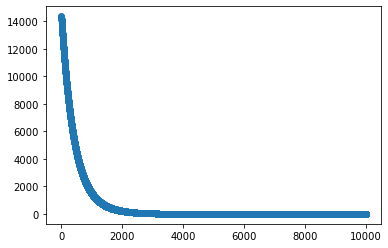

In [38]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

x=len(fin[0])-1
plt.scatter(range(x),fin[2])



In [ ]:
Wykres wyraźnie wskazuje, że znaczący wzrost epok nie jest równoznaczny z zmieniejszaniem się błędu regresji- 
spada on dość drastycznie tylko do pewnej ilości epok po czym trzymuje się na pewnym poziomie spadając tylko nieznacznie.
Można zmienijszyć ilość epok co nie wpłynie na wyniki a znaczącą zoptymalizuje algorytm pod względem ilości potrzebnych 
obliczeń do wykonania.